In [52]:
import pandas as pd

filenames = [
    'chep_contrib_2023.csv',
    'chep_contrib_2021.csv',
    'chep_contrib_2019.csv',
    'chep_contrib_2018.csv',
    'chep_contrib_2016.csv',
]

key_words = [
    'AI', 'artificial intelligence',
    'machine learning', 'ML',
    'neural network', 'NN',
    'deep learning', 
    'Generative Adversarial Network', 'GAN',
    'GNN', 
    'encoder', 'autoencoder', 'TMVA',
    'diffusion model'
]

In [53]:
stats = []
kw_titles_df = pd.DataFrame()


def get_match_case(keyword):
    if keyword in ['AI', 'ML', 'GAN', 'GPU', 'GNN', 'NN', 'TMVA']:
        return True
    return False

for filename in filenames:
    year = int(filename[13:17])
    df = pd.read_csv(filename)
    cur_year_dict = {'year': year}
    title_set = set()

    for kw in key_words:
        count = df['Title'].str.contains(kw, case=get_match_case(kw)).sum()
        cur_year_dict.update({kw: count})
        
        filtered_titles = df[df['Title'].str.contains(kw, case=get_match_case(kw))]
        for title in filtered_titles['Title']:
            title_set.add(title)
    
    filtered_rows = df[df['Title'].isin(list(title_set))]
    kw_titles_df = pd.concat([kw_titles_df, filtered_rows])
    
    cur_year_dict.update({'sum': len(title_set)}) 
    
    stats.append(cur_year_dict)

# print(stats)

In [54]:
stats_df = pd.DataFrame(stats)
print(stats_df)

   year  AI  artificial intelligence  machine learning  ML  neural network  \
0  2023  10                        6                32   9              17   
1  2021   1                        0                 3   2               9   
2  2019   7                        2                15   4               6   
3  2018   5                        0                16   1               7   
4  2016   1                        0                 6   1               2   

   NN  deep learning  Generative Adversarial Network  GAN  GNN  encoder  \
0   7              6                               2    2    4        3   
1   1              6                               3    2    0        1   
2   1              5                               4    1    0        0   
3   1              6                               1    0    0        1   
4   0              2                               0    0    0        0   

   autoencoder  TMVA  diffusion model  sum  
0            1     1               

<AxesSubplot:xlabel='year'>

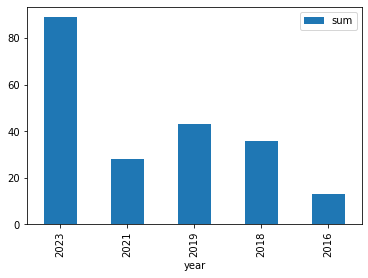

In [55]:
stats_df.plot(x='year',y='sum', kind='bar')

In [56]:
print(kw_titles_df)
kw_titles_df.to_csv(f'CHEP_ML.csv', index=False)

     Year                                               Link  \
5    2023  https://indico.jlab.org/event/459/contribution...   
8    2023  https://indico.jlab.org/event/459/contribution...   
9    2023  https://indico.jlab.org/event/459/contribution...   
21   2023  https://indico.jlab.org/event/459/contribution...   
41   2023  https://indico.jlab.org/event/459/contribution...   
..    ...                                                ...   
391  2016  https://indico.cern.ch/event/505613/contributi...   
397  2016  https://indico.cern.ch/event/505613/contributi...   
441  2016  https://indico.cern.ch/event/505613/contributi...   
493  2016  https://indico.cern.ch/event/505613/contributi...   
552  2016  https://indico.cern.ch/event/505613/contributi...   

                                                 Title  \
5    Distributed Machine Learning with PanDA and iD...   
8    Machine learning for ambiguity resolution in ACTS   
9    MLHad: Simulating Hadronization with Machine L...   